In [73]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
def gaussSeidel(iterEqs,x, k1 = 2, tol = 1.0e-9):
    omega = 1.0
    k = 10
    p = 1
    for i in range(1,501):
        xOld = x.copy()
        x = iterEqs(x,omega, k1)
        dx = math.sqrt(np.dot(x-xOld,x-xOld))
        if dx < tol: return x,i,omega
      # Compute relaxation factor after k+p iterations
        if i == k: dx1 = dx
        if i == k + p:
            dx2 = dx
            omega = 2.0/(1.0 + math.sqrt(1.0 - (dx2/dx1)**(1.0/p)))
    print('Gauss-Seidel failed to converge')

In [83]:
def iterEqs(x, omega, k):
    n = len(x)
    x[0] = omega*(x[1] - x[n-1])/k + (1.0 - omega)*x[0]
    for i in range(1, n-1):
        x[i] = omega*(x[i-1] + x[i+1])/k + (1.0 - omega)*x[i]
    x[n-1] = omega*(100.0 - x[0] + x[n-2])/k + (1.0 - omega)*x[n-1]
    return x

In [84]:
n = 20
k = 2
x = np.zeros(n)
x, numIter, omega = gaussSeidel(iterEqs, x, k)
print("number of iterations = ", numIter)
print("Relaxation factor = ", omega)
print("the solution is:\n", x)

number of iterations =  314
Relaxation factor =  1.705452310713146
the solution is:
 [ -4.50000000e+02  -4.00000000e+02  -3.50000000e+02  -3.00000000e+02
  -2.50000000e+02  -2.00000000e+02  -1.50000000e+02  -1.00000000e+02
  -5.00000000e+01  -2.67935113e-10   5.00000000e+01   1.00000000e+02
   1.50000000e+02   2.00000000e+02   2.50000000e+02   3.00000000e+02
   3.50000000e+02   4.00000000e+02   4.50000000e+02   5.00000000e+02]


n: 20
iterations [ 314.   28.   21.   17.]
factor [ 1.70545231  1.16407849  1.09767976  1.06956352]
n: 40
iterations [ 29.  21.  17.]
factor [ 1.1640943   1.09767999  1.06956352]
n: 100
iterations [ 29.  21.  17.]
factor [ 1.1640943   1.09767999  1.06956352]


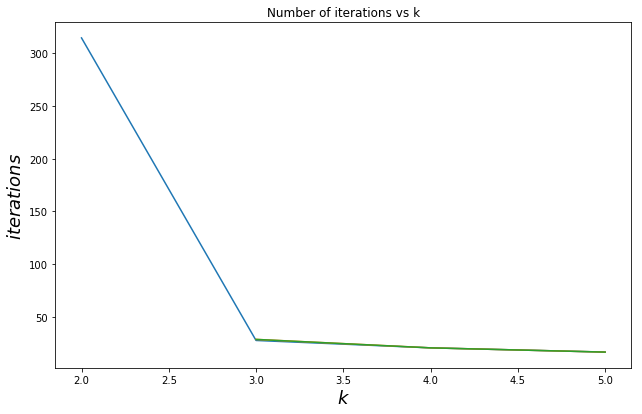

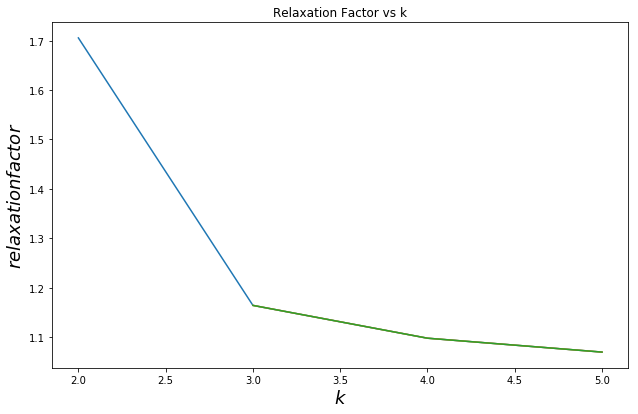

In [77]:
fig1 = plt.figure(figsize=(10,6))
axes1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])
axes1.set_xlabel(r"$k$",fontsize=18)
axes1.set_ylabel(r"$iterations$",fontsize=18)
axes1.set_title('Number of iterations vs k')

fig2 = plt.figure(figsize=(10,6))
axes2 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])
axes2.set_xlabel(r"$k$",fontsize=18)
axes2.set_ylabel(r"$relaxation factor$",fontsize=18)
axes2.set_title('Relaxation Factor vs k')

N = np.array([20, 40, 100])
for n in N:
    print("n:", n)
    if(n == 20):
        k = np.array([2.0, 3.0, 4.0, 5.0])
        iterations = np.zeros(4)
        relaxationFactor = np.zeros(4)
        for i in range(4):
            x = np.zeros(n)
            x, iterations[i], relaxationFactor[i] = gaussSeidel(iterEqs, x, k[i])
        axes1.plot(k, iterations)
        axes2.plot(k, relaxationFactor)
        print("iterations", iterations)
        print("factor", relaxationFactor)
    else:
        k = np.array([3.0, 4.0, 5.0])
        iterations = np.zeros(3)
        relaxationFactor = np.zeros(3)
        for i in range(3):
            x = np.zeros(n)
            x, iterations[i], relaxationFactor[i] = gaussSeidel(iterEqs, x, k[i])
        axes1.plot(k, iterations)
        axes2.plot(k, relaxationFactor)     
        print("iterations", iterations)
        print("factor", relaxationFactor)